In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MMM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Load the processed data from the first notebook
df = pd.read_csv('processed_analyst_ratings.csv')  # or use .read_pickle for Pickle format

# Display the first few rows to verify the data
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,day_of_week
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,Friday


In [4]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def analyze_sentiment(headline):
    sentiment = sia.polarity_scores(headline)
    return sentiment['compound']  # We use 'compound' score as a single measure of sentiment

# Apply sentiment analysis to the 'headline' column 
df['sentiment_score'] = df['headline'].apply(analyze_sentiment)
# Categorize sentiment as positive, negative, or neutral
#df['sentiment_category'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0.05  else ('negative' if x < -0.05 else 'neutral'))
# Define a function to categorize sentiment scores
def categorize_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -1: 
        return 'very negative'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [5]:
# Apply the function to the 'sentiment_score' column to create a new column 'sentiment_category'
df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Display the first few rows to check the categorization
df.head()

# Display the first few rows to check the results
print(df[['headline', 'sentiment_score', 'sentiment_category']].head())

                                            headline  sentiment_score  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   

  sentiment_category  
0            neutral  
1            neutral  
2            neutral  
3            neutral  
4           positive  


In [6]:
# Check how many scores are below -1
very_negative_count = (df['sentiment_score'] < -1).sum()
print(f"Number of very negative sentiment scores: {very_negative_count}")

Number of very negative sentiment scores: 0


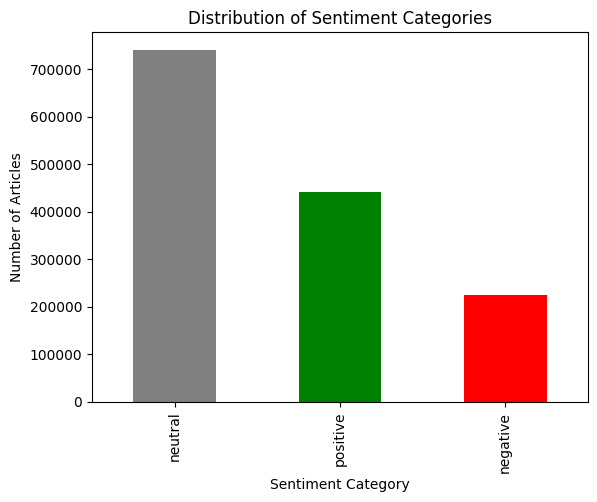

In [7]:
#Plotting the distribution of sentiment categories
import matplotlib.pyplot as plt

# Plot the distribution of sentiment categories
df['sentiment_category'].value_counts().plot(kind='bar', color=['gray', 'green', 'red'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Articles')
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Set the 'date' column as the DataFrame index for time-based operations
df.set_index('date', inplace=True)

# Check if the conversion worked and the index is now datetime
print(df.index)

DatetimeIndex(['2020-06-05 14:30:54+00:00', '2020-06-03 14:45:20+00:00',
               '2020-05-26 08:30:07+00:00', '2020-05-22 16:45:06+00:00',
               '2020-05-22 15:38:59+00:00', '2020-05-22 15:23:25+00:00',
               '2020-05-22 13:36:20+00:00', '2020-05-22 13:07:04+00:00',
               '2020-05-22 12:37:59+00:00', '2020-05-22 12:06:17+00:00',
               ...
                                     'NaT',                       'NaT',
                                     'NaT',                       'NaT',
                                     'NaT',                       'NaT',
                                     'NaT',                       'NaT',
                                     'NaT',                       'NaT'],
              dtype='datetime64[ns, UTC]', name='date', length=1407328, freq=None)


C:\Users\MMM\AppData\Local\Temp\ipykernel_14908\1625028349.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df.resample('M')['sentiment_score'].mean()


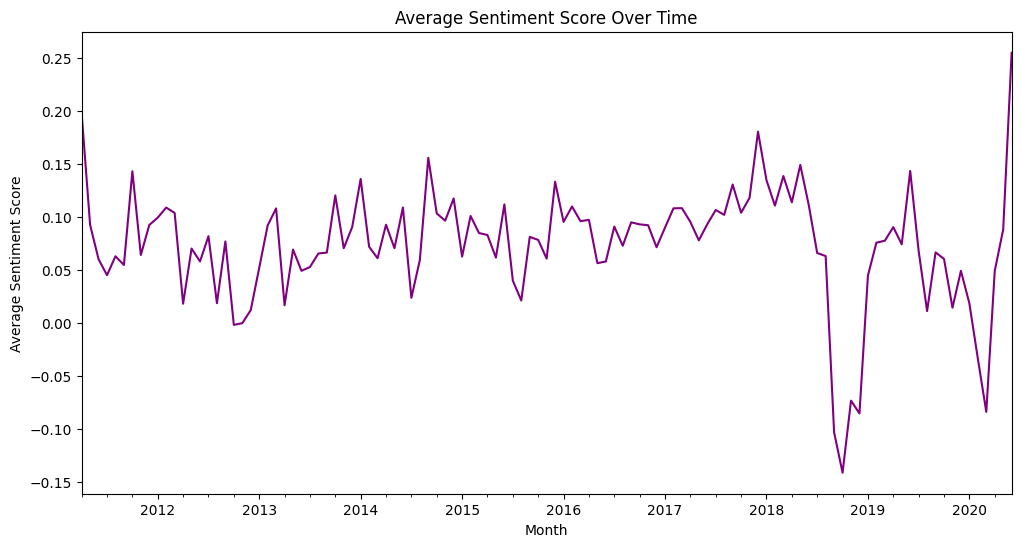

In [11]:
#Sentiment Over Time
# Calculate the average sentiment score by month
monthly_sentiment = df.resample('M')['sentiment_score'].mean()

# Plot sentiment trend over time
monthly_sentiment.plot(figsize=(12, 6), color='purple')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.show()

C:\Users\MMM\AppData\Local\Temp\ipykernel_14908\3230386256.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df.resample('M')['sentiment_score'].mean()


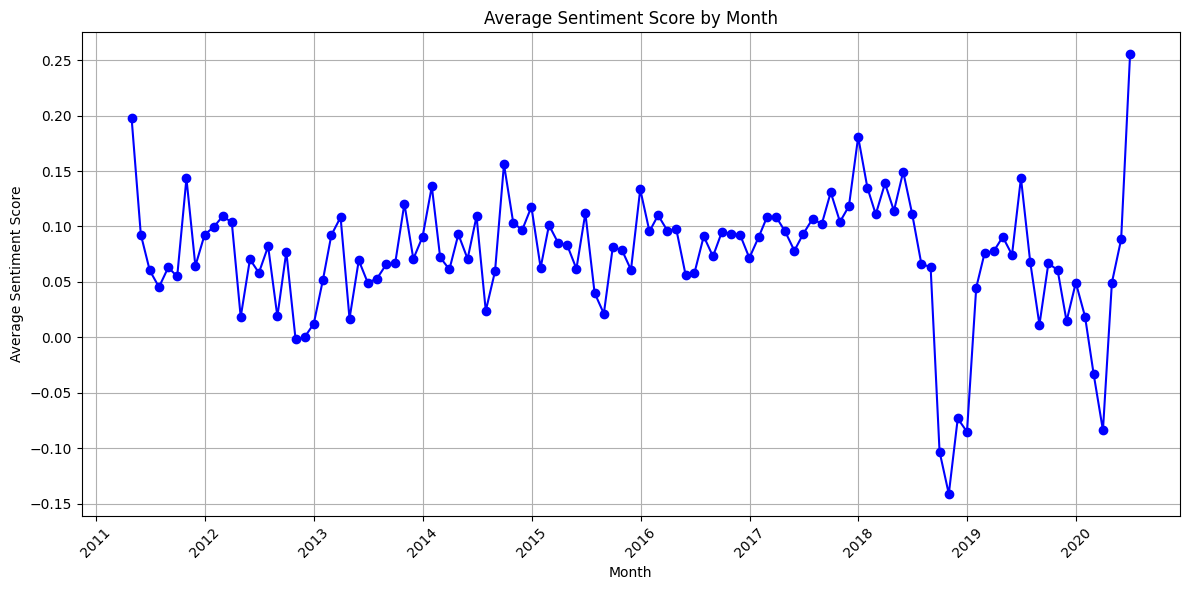

In [12]:
# Resample by month and calculate average sentiment score
monthly_sentiment = df.resample('M')['sentiment_score'].mean()

# Plot sentiment trend over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', linestyle='-', color='blue')
plt.title('Average Sentiment Score by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

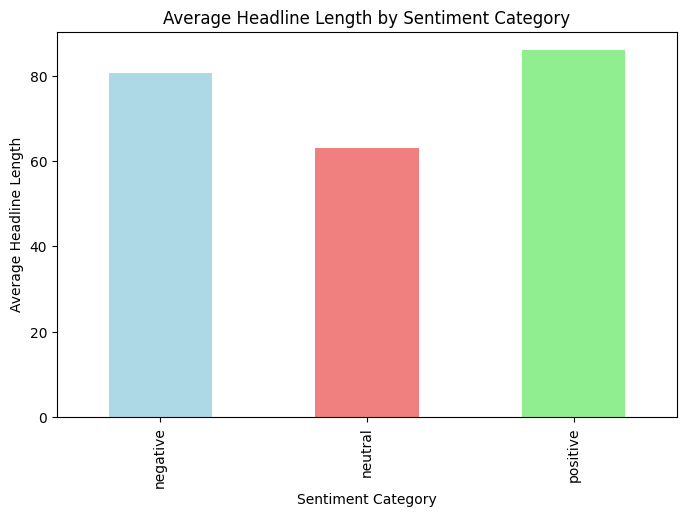

In [14]:
#Sentiment Distribution by Article Length
# Create a new column for headline length
df['headline_length'] = df['headline'].apply(len)

# Group by sentiment category and calculate average headline length
sentiment_length = df.groupby('sentiment_category')['headline_length'].mean()

# Plot headline length by sentiment category
sentiment_length.plot(kind='bar', figsize=(8, 5), color=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Average Headline Length by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Headline Length')
plt.show()


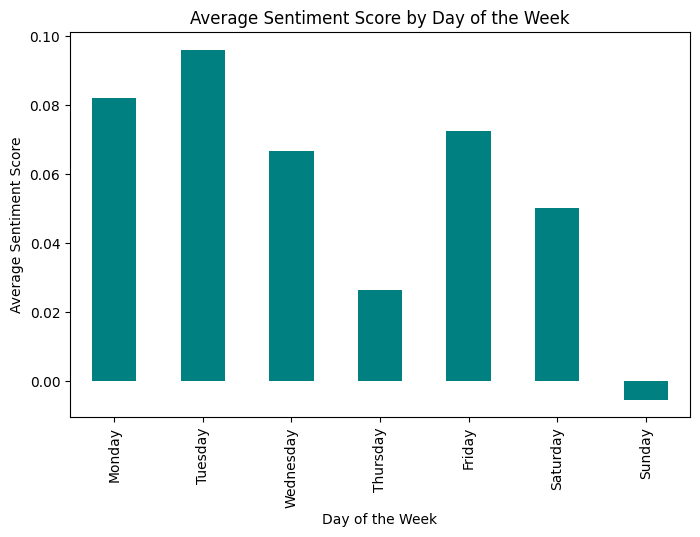

In [15]:
#Sentiment Over Different Days of the Week
# Add a column for the day of the week
df['day_of_week'] = df.index.day_name()

# Calculate average sentiment score by day of the week
day_sentiment = df.groupby('day_of_week')['sentiment_score'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot sentiment by day of the week
day_sentiment.plot(kind='bar', figsize=(8, 5), color='teal')
plt.title('Average Sentiment Score by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sentiment Score')
plt.show()

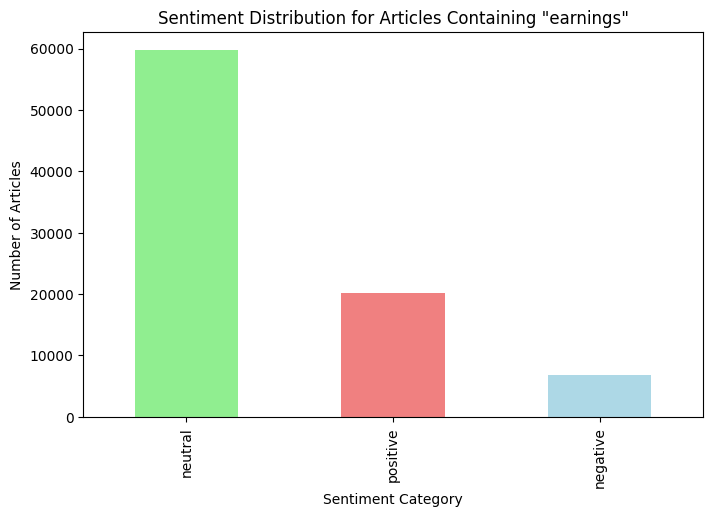

In [16]:
#Sentiment for Specific Events or Keywords
# Filter articles containing specific keywords
keyword = 'earnings'
keyword_df = df[df['headline'].str.contains(keyword, case=False)]

# Plot sentiment distribution for the filtered articles
keyword_df['sentiment_category'].value_counts().plot(kind='bar', figsize=(8, 5), color=['lightgreen', 'lightcoral', 'lightblue'])
plt.title(f'Sentiment Distribution for Articles Containing "{keyword}"')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Articles')
plt.show()